# Task 1: Subjectivity in News Articles

## Task Description

Systems are challenged to distinguish whether a sentence from a news article expresses the subjective view of the author behind it or presents an objective view on the covered topic instead.
This is a binary classification tasks in which systems have to identify whether a text sequence (a sentence or a paragraph) is subjective (SUBJ) or objective (OBJ).
The task comprises three settings:

* Monolingual: train and test on data in a given language L

* Multilingual: train and test on data comprising several languages

* Zero-shot: train on several languages and test on unseen languages

### Contents of the Task 1 Directory

* Main folder: data

  Contains a subfolder for each language which contain the data as TSV format with .tsv extension (train_LANG.tsv, dev_LANG.tsv, dev_test_LANG.tsv, test_LANG.tsv). As LANG we used standard language code for each language.

* Main folder: baseline

  Contains a single file, baseline.py, used to train a baseline and provide predictions.

* Main folder: scorer

  Contains a single file, evaluate.py, that checks the format of a submission and evaluate the various metrics.

### Input Data Format
The data will be provided as a TSV file with three columns:

    sentence_id  sentence  label

Where:

* sentence_id: sentence id for a given sentence in a news article

* sentence: sentence's text

* label: OBJ and SUBJ


Examples:

    b9e1635a-72aa-467f-86d6-f56ef09f62c3  Gone are the days when they led the world in recession-busting SUBJ
    f99b5143-70d2-494a-a2f5-c68f10d09d0a  The trend is expected to reverse as soon as next month.  OBJ

### Output Data Format
The output must be a TSV format with two columns: sentence_id and label.

### Evaluation Metrics
This task is evaluated as a classification task. We will use the F1-macro measure for the ranking of teams.
We will also measure Precision, Recall, and F1 of the SUBJ class and the macro-averaged scores.


### Scorers
To evaluate the output of your model which should be in the output format required, please run the script below:

    python evaluate.py -g dev_truth.tsv -p dev_predicted.tsv

where dev_predicted.tsv is the output of your model on the dev set, and dev_truth.tsv is the golden label file provided by us.
The file can be used also to validate the format of the submission, simply use the provided test file as gold data.
The evaluation will not be performed, but the format of your input will be checked.

### Baselines
The script to train the baseline is provided in the related directory.
The script can be run as follow:

    python baseline.py -trp train_data.tsv -ttp dev_data.tsv

where train_data.tsv is the file to be used for training and dev_data.tsv is the file on which doing the prediction.
The baseline is a logistic regressor trained on a Sentence-BERT multilingual representation of the data.

## Data Loading

In [1]:
!apt-get install git-lfs -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!git clone https://gitlab.com/checkthat_lab/clef2025-checkthat-lab.git

Cloning into 'clef2025-checkthat-lab'...
remote: Enumerating objects: 866, done.
remote: Counting objects: 100% (845/845), done.
remote: Compressing objects: 100% (426/426), done.
remote: Total 866 (delta 413), reused 829 (delta 406), pack-reused 21 (from 1)
Receiving objects: 100% (866/866), 78.96 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (417/417), done.
Updating files: 100% (181/181), done.


In [3]:
# !pip install pandas

In [4]:
DATA_PATH = "clef2025-checkthat-lab/task1/data"
SCORER_PATH = "clef2025-checkthat-lab/task1/scorer"

In [5]:
import pandas as pd

In [6]:
# ARABIC
train_path = f'{DATA_PATH}/arabic/train_ar.tsv'
dev_path = f'{DATA_PATH}/arabic/dev_ar.tsv'

df_train_ar = pd.read_csv(train_path, sep='\t')
df_dev_ar = pd.read_csv(dev_path, sep='\t')

# BULGARIAN
train_path = f'{DATA_PATH}/bulgarian/train_bg.tsv'
dev_path = f'{DATA_PATH}/bulgarian/dev_bg.tsv'

df_train_bg = pd.read_csv(train_path, sep='\t')
df_dev_bg = pd.read_csv(dev_path, sep='\t')

# ENGLISH
train_path = f'{DATA_PATH}/english/train_en.tsv'
dev_path = f'{DATA_PATH}/english/dev_en.tsv'

df_train_en = pd.read_csv(train_path, sep='\t')
df_dev_en = pd.read_csv(dev_path, sep='\t')

# GERMAN
train_path = f'{DATA_PATH}/german/train_de.tsv'
dev_path = f'{DATA_PATH}/german/dev_de.tsv'

df_train_de = pd.read_csv(train_path, sep='\t')
df_dev_de = pd.read_csv(dev_path, sep='\t')

# ITALIAN
train_path = f'{DATA_PATH}/italian/train_it.tsv'
dev_path = f'{DATA_PATH}/italian/dev_it.tsv'

df_train_it = pd.read_csv(train_path, sep='\t')
df_dev_it = pd.read_csv(dev_path, sep='\t')

# MONOLINGUAL - TEST ON ENGLISH AND ITALIAN
test_path = f'{DATA_PATH}/english/test_en_labeled.tsv'
df_test_en = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/italian/test_it_labeled.tsv'
df_test_it = pd.read_csv(test_path, sep='\t')

# MULTILINGUAL - TEST ON ARABIC, BULGARIAN, ENGLISH, GERMAN AND ITALIAN
test_path = f'{DATA_PATH}/multilingual/test_multilingual_labeled.tsv'

df_test_multi = pd.read_csv(test_path, sep='\t')

# ZERO-SHOT - TEST ON GREEK, POLISH, ROMANIAN AND UKRAINIAN
test_path = f'{DATA_PATH}/greek/test_gr_labeled.tsv'
df_test_gr = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/polish/test_pol_labeled.tsv'
df_test_pol = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/romanian/test_ro_labeled.tsv'
df_test_ro = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/ukrainian/test_ukr_labeled.tsv'
df_test_ukr = pd.read_csv(test_path, sep='\t')

In [7]:
# Keep only the required columns
df_train_en = df_train_en[['sentence_id', 'sentence', 'label']]
df_dev_en = df_dev_en[['sentence_id', 'sentence', 'label']]

# Encode labels: OBJ -> 1, SUBJ -> 0
df_train_ar['label'] = df_train_ar['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_ar['label'] = df_dev_ar['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_bg['label'] = df_train_bg['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_bg['label'] = df_dev_bg['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_en['label'] = df_train_en['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_en['label'] = df_dev_en['label'].map({'OBJ': 1, 'SUBJ': 0})
df_test_en['label'] = df_test_en['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_de['label'] = df_train_de['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_de['label'] = df_dev_de['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_it['label'] = df_train_it['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_it['label'] = df_dev_it['label'].map({'OBJ': 1, 'SUBJ': 0})
df_test_it['label'] = df_test_it['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_multi['label'] = df_test_multi['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_gr['label'] = df_test_gr['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_pol['label'] = df_test_pol['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_ro['label'] = df_test_ro['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_ukr['label'] = df_test_ukr['label'].map({'OBJ': 1, 'SUBJ': 0})

<ipython-input-7-42071ef08fce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_en['label'] = df_train_en['label'].map({'OBJ': 1, 'SUBJ': 0})
<ipython-input-7-42071ef08fce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev_en['label'] = df_dev_en['label'].map({'OBJ': 1, 'SUBJ': 0})


In [8]:
def print_shape(df1, df2, df3):
    """
    Utility function to print the shape of the three dataframes
    """
    if df1 is not None:
        print("Train dataframe:    {} rows and {} columns".format(df1.shape[0], df1.shape[1]))
    if df2 is not None:
        print("Dev dataframe:       {} rows and {} columns".format(df2.shape[0], df2.shape[1]))
    if df3 is not None:
        print("Test dataframe:      {} rows and {} columns".format(df3.shape[0], df3.shape[1]))
    print("--------------------------------------------")

In [9]:
print("ARABIC")
print_shape(df_train_ar, df_dev_ar, None)
print("BULGARIAN")
print_shape(df_train_bg, df_dev_bg, None)
print("ENGLISH")
print_shape(df_train_en, df_dev_en, df_test_en)
print("GERMAN")
print_shape(df_train_de, df_dev_de, None)
print("ITALIAN")
print_shape(df_train_it, df_dev_it, df_test_it)
print("MULTILINGUAL")
print_shape(None, None, df_test_multi)
print("GREEK")
print_shape(None, None, df_test_gr)
print("POLISH")
print_shape(None, None, df_test_pol)
print("ROMANIAN")
print_shape(None, None, df_test_ro)
print("UKRAINIAN")
print_shape(None, None, df_test_ukr)

ARABIC
Train dataframe:    2446 rows and 3 columns
Dev dataframe:       467 rows and 3 columns
--------------------------------------------
BULGARIAN
Train dataframe:    691 rows and 3 columns
Dev dataframe:       306 rows and 3 columns
--------------------------------------------
ENGLISH
Train dataframe:    830 rows and 3 columns
Dev dataframe:       462 rows and 3 columns
Test dataframe:      300 rows and 3 columns
--------------------------------------------
GERMAN
Train dataframe:    800 rows and 3 columns
Dev dataframe:       491 rows and 3 columns
--------------------------------------------
ITALIAN
Train dataframe:    1613 rows and 3 columns
Dev dataframe:       667 rows and 3 columns
Test dataframe:      299 rows and 3 columns
--------------------------------------------
MULTILINGUAL
Test dataframe:      1982 rows and 3 columns
--------------------------------------------
GREEK
Test dataframe:      284 rows and 3 columns
--------------------------------------------
POLISH
Test 

In [10]:
# Keep the original sentence for error analysis
original_sentence_en = df_test_en["sentence"]
# Keep the original sentence for error analysis
original_sentence_it = df_test_it["sentence"]

### Utils

In [11]:
def plot_confusion_matrix(model, results):
    cm = confusion_matrix(results["true_label"], results["predicted_label"], labels=[0, 1])
    cmd = ConfusionMatrixDisplay(cm, display_labels=["Subjective", "Objective"])
    cmd.plot(cmap="Blues")
    plt.xlabel('Predicted Label', fontsize=18, labelpad=14)
    plt.ylabel('True Label', fontsize=18, labelpad=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#    plt.title(f"{model}: Confusion Matrix")
#    plt.savefig(f"outputs/cm_{model}.png", bbox_inches='tight')
    plt.show()

    cm = confusion_matrix(results["true_label"], results["predicted_label"], labels=[0, 1], normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=["Subjective", "Objective"])
    cmd.plot(cmap="Blues")
    plt.xlabel('Predicted Label', fontsize=18, labelpad=14)
    plt.ylabel('True Label', fontsize=18, labelpad=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#    plt.title(f"{model}: Normalized Confusion Matrix")
#    plt.savefig(f"outputs/cm_{model}_norm.png", bbox_inches='tight')
    plt.show()

def plot_precision_recall_curve(model, precision, recall, average_precision):
    # Plot the Precision-Recall curve
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model}: Precision-Recall Curve (AP = {average_precision:.2f})')
    # plt.savefig(f"outputs/pr_curve_{model}.png")
    plt.show()

## Solution 1: Transformer

### Utils

In [12]:
# !pip install transformers
# !pip install datasets
# !pip install accelerate -U
!pip install evaluate
# !pip install bitsandbytes
# !pip install tf-keras
# !pip install sentencepiece
# !pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.5 MB/s eta 0:00:00


In [13]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import shutil
import torch

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True, padding=True)

# Metrics
f1_metric = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    result = f1_metric.compute(predictions=preds, references=labels, average="macro")
    return {"f1_macro": result["f1"]}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [15]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available.")

GPU is available: Tesla T4


### Monolingual

#### English

In [16]:
dataset_train = Dataset.from_pandas(df_train_en)
dataset_val = Dataset.from_pandas(df_dev_en)
dataset_test = Dataset.from_pandas(df_test_en)

In [17]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/infoxlm-base")

tokenized_train = dataset_train.map(preprocess_function, batched=True)
tokenized_val = dataset_val.map(preprocess_function, batched=True)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/462 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [18]:
# Load model
model = AutoModelForSequenceClassification.from_pretrained("microsoft/infoxlm-base", num_labels=2)

pytorch_model.bin:   0%|          | 0.00/942M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/942M [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/infoxlm-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="logs",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    report_to="none",
)

In [20]:
# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [21]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [22]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [ ]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.709340,0.324561
2,No log,0.780278,0.324561
3,No log,0.701764,0.324561


TrainOutput(global_step=156, training_loss=0.6464801690517328, metrics={'train_runtime': 5710.0012, 'train_samples_per_second': 0.436, 'train_steps_per_second': 0.027, 'total_flos': 202174123827600.0, 'train_loss': 0.6464801690517328, 'epoch': 3.0})

In [ ]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.7093403339385986, 'eval_f1_macro': 0.32456140350877194, 'eval_runtime': 143.8223, 'eval_samples_per_second': 3.212, 'eval_steps_per_second': 0.202, 'epoch': 3.0}


In [ ]:
# Save model
trainer.save_model("infoxml-subjectivity-en")

In [ ]:
# Test Evaluation
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_en["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("mono_en_test_predictions.tsv", sep="\t", index=False)

In [ ]:
# Run scorer
# !python scorer/evaluate.py -g data/english/test_en_labeled.tsv -p mono_en_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/english/test_en_labeled.tsv \
    -p mono_en_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.4175
            macro-P: 0.3583
            macro-R: 0.5000
            
            SUBJ-F1: 0.0000
            SUBJ-P: 0.0000
            SUBJ-R: 0.0000
            
            accuracy: 0.7167
        


#### Error Analysis

In [ ]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [ ]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_en["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [ ]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (infoxml): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (infoxml): 85

EXAMPLES:

	That sounds worryingly similar to the vainglorious delivery timetable once claimed during the sorry saga called HS2.

	If Timbaland releases a number one hit soon, we can get the full 2006 experience again.

	She is treating opposition as a compliment to her steely determination to implement her new doctrine of growth-at-any-cost.

	Hostile fire was instant, will be continuous for years ahead and comes from several camps with which Labour has wanted to be friendly.

	since the US failed to confront it head-on during the Bay of Pigs invasion, it has instead kept Cuba in stasis, trapped in that moment before the celebrations can truly begin.

	A serious rebuilding programme would scare those who have the Chancellor’s ear.

	I suspect that the Net Zero Secretary thinks that resignation would be a pointless gesture of opposition to something that may well not happen and certainly not anytime soon.

	Both are young, charismatic, intellige

In [ ]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (infoxml): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (infoxml): 0

EXAMPLES:



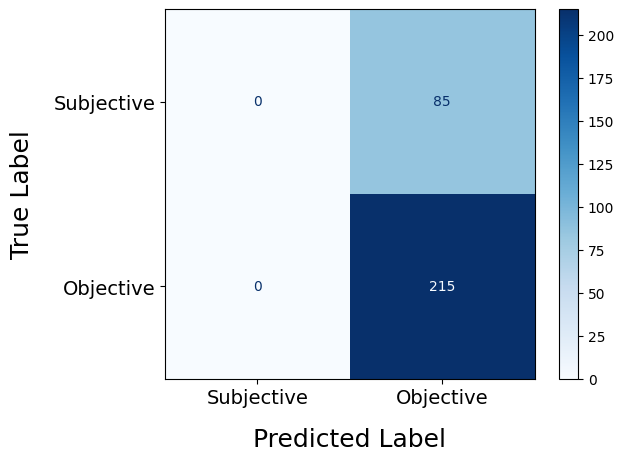

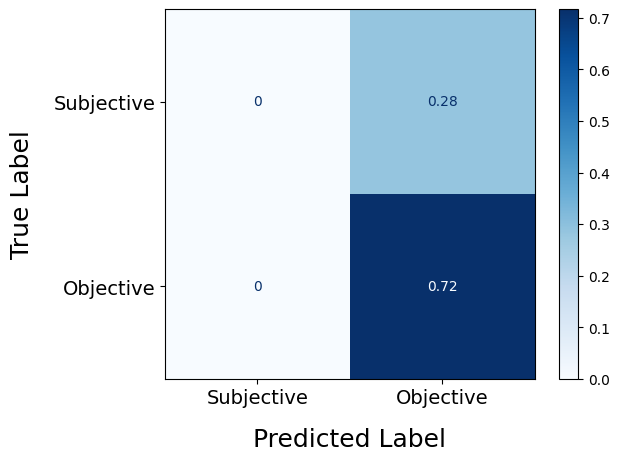

In [ ]:
plot_confusion_matrix("infoxml", test_results)

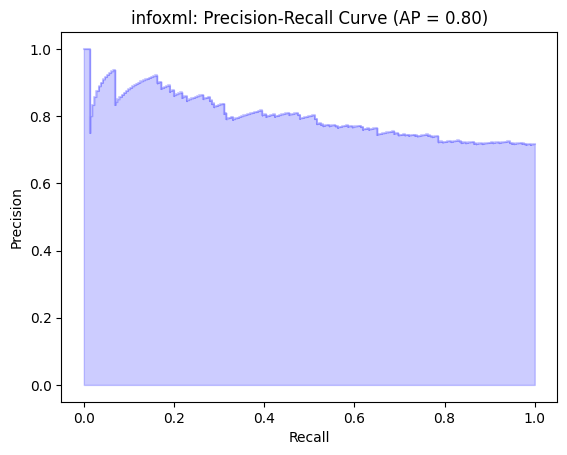

In [ ]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

#### Italian

In [ ]:
dataset_train = Dataset.from_pandas(df_train_it)
dataset_val = Dataset.from_pandas(df_dev_it)
dataset_test = Dataset.from_pandas(df_test_it)

In [ ]:
# Tokenization
tokenized_train = dataset_train.map(preprocess_function, batched=True)
tokenized_val = dataset_val.map(preprocess_function, batched=True)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/1613 [00:00<?, ? examples/s]

Map:   0%|          | 0/667 [00:00<?, ? examples/s]

Map:   0%|          | 0/299 [00:00<?, ? examples/s]

In [ ]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.508260,0.423509
2,No log,0.480476,0.573101
3,No log,0.479270,0.644405


TrainOutput(global_step=303, training_loss=0.5122883107402537, metrics={'train_runtime': 10094.8598, 'train_samples_per_second': 0.479, 'train_steps_per_second': 0.03, 'total_flos': 335705553866700.0, 'train_loss': 0.5122883107402537, 'epoch': 3.0})

In [ ]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [ ]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.4792702794075012, 'eval_f1_macro': 0.6444050603728999, 'eval_runtime': 527.8245, 'eval_samples_per_second': 1.264, 'eval_steps_per_second': 0.08, 'epoch': 3.0}


In [ ]:
# Save model
trainer.save_model("infoxml-subjectivity-it")

In [ ]:
# Test Evaluation
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_it["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("mono_it_test_predictions.tsv", sep="\t", index=False)

In [ ]:
# Run scorer
# !python scorer/evaluate.py -g data/italian/test_it_labeled.tsv -p mono_it_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/italian/test_it_labeled.tsv \
    -p mono_it_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6067
            macro-P: 0.7430
            macro-R: 0.6147
            
            SUBJ-F1: 0.4028
            SUBJ-P: 0.7838
            SUBJ-R: 0.2710
            
            accuracy: 0.7124
        


#### Error Analysis

In [ ]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [ ]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_it["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [ ]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (infoxml): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (infoxml): 78

EXAMPLES:

	Meglio che di sinistra.

	Tempo al tempo vedremo.

	Nelle dolomiti c'è posto per tutti.

	Non siamo mai contenti

	L'ostentazione della burineria e servizi montani penosi.

	Poi il leader M5S è durissimo con il ministro Nordio:

	Conte infanga Meloni?

	Il Repower-EU ha provato a tracciare la rotta in merito all’indipendenza energetica, che tutto è tranne che autosufficienza dell’UE.

	Capisco il senso di appartenenza... ma addirittura masochisti purché sia di Destra,

	In questi anni ci siamo battuti contro gli striscianti tentativi di riavviare nel nostro Paese un percorso di ritorno all’energia da fissione nucleare, una fonte insostenibile sotto tutti i punti di vista, la fantomatica quarta generazione – pur efficientando alcuni aspetti delle esperienze precedenti – non supera i problemi già noti e su cui in ben due occasioni in Italia ha vinto un forte “NO” referendario.



In [ ]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (infoxml): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (infoxml): 8

EXAMPLES:

	In questo quadro di competizione e guerra che coinvolge innanzitutto il mercato energetico, la narrazione Italiana costruita dal Governo Meloni sulla “sicurezza energetica” si inserisce perfettamente.

	E' quindi ipotizzabile che si assista a una fase in cui oro e dollaro si muovono nella stessa direzione, senza necessariamente influenzarsi a vicenda.

	"Sappiate che quando manca la politica i magistrati si prendono quello spazio e vogliono governare, accade da trent’anni almeno":

	L’attitudine a darsi del tu e chiamarsi per nome più spesso che in passato non implica che sia sempre appropriato e inoffensivo farlo

	La spesa che non c'è

	Che problema è?

	Non possiamo ancora fare delle valitazioni serie.

	Giù anche l'oro, asset rifugio per eccellenza.



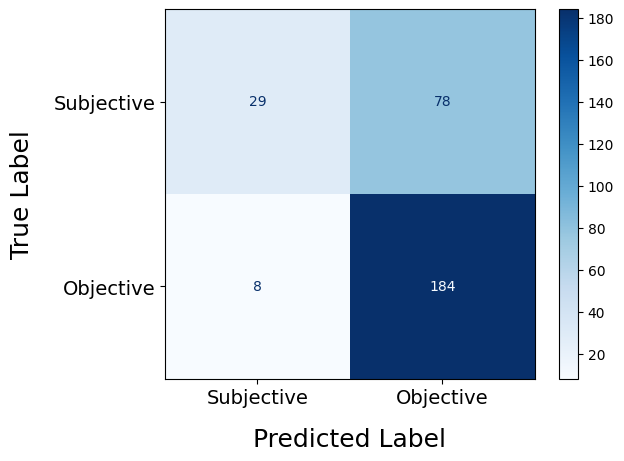

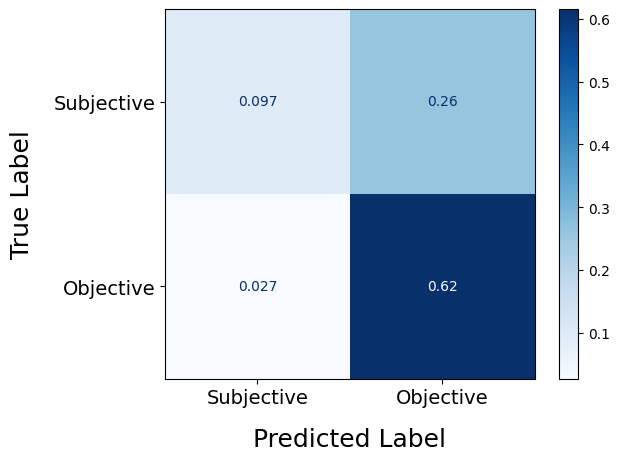

In [ ]:
plot_confusion_matrix("infoxml", test_results)

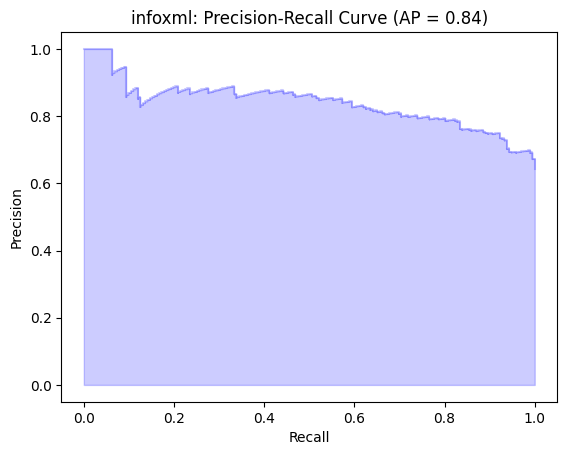

In [ ]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

### Multilungual

In [28]:
# Combine Multilingual Training Data
df_train_multi = pd.concat([df_train_ar, df_train_bg, df_train_en, df_train_de, df_train_it])
df_dev_multi = pd.concat([df_dev_ar, df_dev_bg, df_dev_en, df_dev_de, df_dev_it])

In [29]:
dataset_train = Dataset.from_pandas(df_train_multi)
dataset_val = Dataset.from_pandas(df_dev_multi)
dataset_test = Dataset.from_pandas(df_test_multi)

In [30]:
def preprocess_function_with_max_length(examples):
        return tokenizer(examples["sentence"], truncation=True, padding="max_length", max_length=512) # You can adjust max_length

In [31]:
# Tokenization
tokenized_train = dataset_train.map(preprocess_function_with_max_length, batched=True)
tokenized_val = dataset_val.map(preprocess_function_with_max_length, batched=True)
tokenized_test = dataset_test.map(preprocess_function_with_max_length, batched=True)

Map:   0%|          | 0/6380 [00:00<?, ? examples/s]

Map:   0%|          | 0/2393 [00:00<?, ? examples/s]

Map:   0%|          | 0/1982 [00:00<?, ? examples/s]

In [32]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [33]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.607740,0.674294
2,0.649600,0.558929,0.687775
3,0.582200,0.521589,0.713451


TrainOutput(global_step=1197, training_loss=0.6060600121417639, metrics={'train_runtime': 2212.1665, 'train_samples_per_second': 8.652, 'train_steps_per_second': 0.541, 'total_flos': 5035945599590400.0, 'train_loss': 0.6060600121417639, 'epoch': 3.0})

In [34]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [35]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.5215888619422913, 'eval_f1_macro': 0.7134510563188629, 'eval_runtime': 63.9757, 'eval_samples_per_second': 37.405, 'eval_steps_per_second': 2.345, 'epoch': 3.0}


In [36]:
# Save model
trainer.save_model("infoxml-subjectivity-multi")

In [37]:
# Multilingual Test Predictions
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_multi["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("multilingual_test_predictions.tsv", sep="\t", index=False)

In [38]:
# Run scorer
# !python scorer/evaluate.py -g data/multilingual/test_multilingual_labeled.tsv -p multilingual_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/multilingual/test_multilingual_labeled.tsv \
    -p multilingual_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6982
            macro-P: 0.7528
            macro-R: 0.6824
            
            SUBJ-F1: 0.5485
            SUBJ-P: 0.7211
            SUBJ-R: 0.4426
            
            accuracy: 0.7725
        


#### Error Analysis

In [39]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [40]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_multi["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [41]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (infoxml): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (infoxml): 345

EXAMPLES:

	Ecco ad esempio che la Regione Liguria, guidata dalla destra, ha pensato bene di stanziare 220mila euro per un progetto di educazione allaffettività nelle parrocchie e negli oratori.

	ويتطرق عمار إلى التأثيرات المحتملة لموقف ماسك ،  أن ذلك الموقف قد يفاقم التوتر بين واشنطن وبرلين ، خاصة في ظل حساسية المرحلة الحالية مع اقتراب الانتخابات في ألمانيا.

	Il fronte delle opposizioni va durissimo all'attacco della premier Giorgia Meloni e del governo nel dibattito alla Camera dopo le informative dei ministri Carlo Nordio e Matteo Piantedosi sul caso Almasri.

	Alles dank eines experimentellen Impfstoffs, der nur für den Notfall zugelassen ist.

	Lone shoppers lined the aisles in preparation for a Government-mandated 24-hour indoors, with several baskets piled with more food, booze and toilet rolls than any household could conceivably need during such a short time.

	ويبدو أن مستوى الدوري الإنجليزي بشكل عام ونسق مانشستر يونايتد القوي هو ا

In [42]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (infoxml): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (infoxml): 106

EXAMPLES:

	From the lack of vision, the lack of hope.

	Back in the room he’s squatting in, he curls around himself, rejecting the world with his physicality.

	التحول الذي يقوده شي لقد بدأ التحول في نهج شي يصبح واضحا مع اندلاع الحرب في أوكرانيا.

	Anche per effetto dellinfluenza dellinglese, il tu e i verbi alla seconda persona singolare sono da sempre le forme dominanti dellitaliano su Internet e nei contesti digitali.

	I felt like I’d accomplished something creative for the first time in a long time.

	Reading about post-revolutionary cities, one often learns about the tension between the anticipation of the people and the dilapidation around them.

	هل هي طموحات توسعية غير مسبوقة ، أم أنها مجرد أدوات تفاوضية تثير الجدل الإعلامي وتضغط على الخصوم لتحقيق مكاسب ؟

	In den großen Medien dominiert ein Steinwurf in Richtung eines ARD-Teams die Berichterstattung über die Corona-Großkundgebung.

	أصبح ممكنا النظر بجدية إلى وقف إطلاق النار على ج

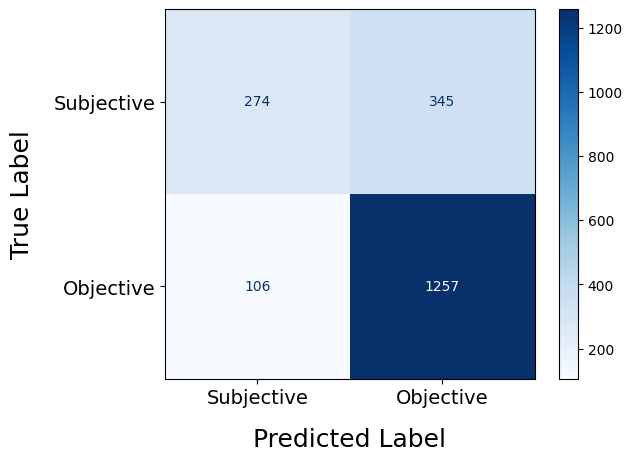

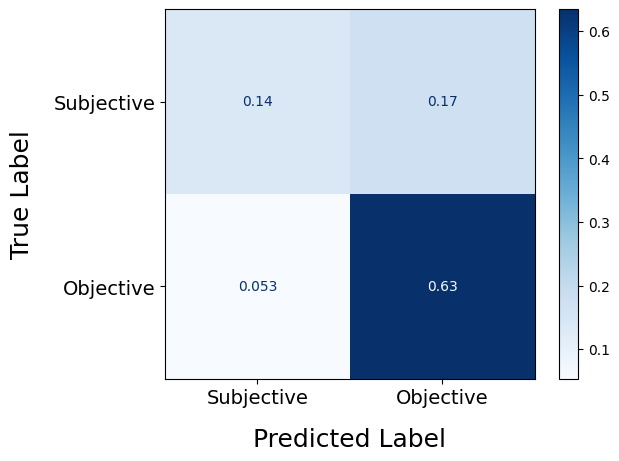

In [43]:
plot_confusion_matrix("infoxml", test_results)

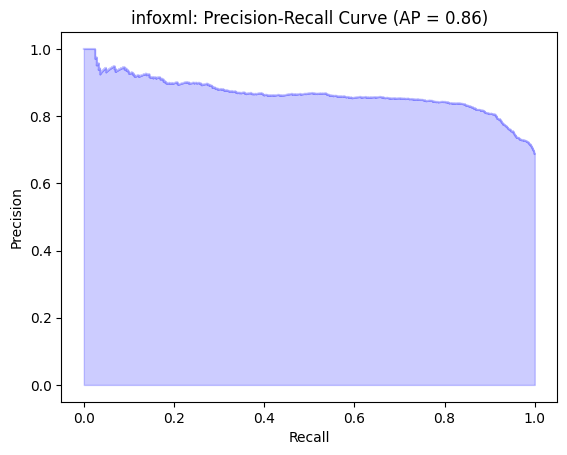

In [44]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

### Zero-Shot

In [45]:
# GREEK

In [46]:
# During testing we found that two examples are classified as "Uncertain", so we decided to not consider these results.

In [55]:
# POLISH

In [56]:
dataset_test = Dataset.from_pandas(df_test_pol)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_pol["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_pol_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/polish/test_pol_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/351 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.5807
            macro-P: 0.7939
            macro-R: 0.6247
            
            SUBJ-F1: 0.4039
            SUBJ-P: 0.9762
            SUBJ-R: 0.2547
            
            accuracy: 0.6553
        


In [57]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_pol["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

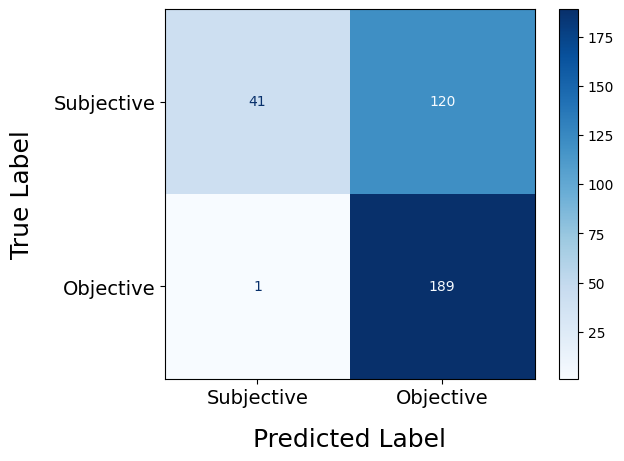

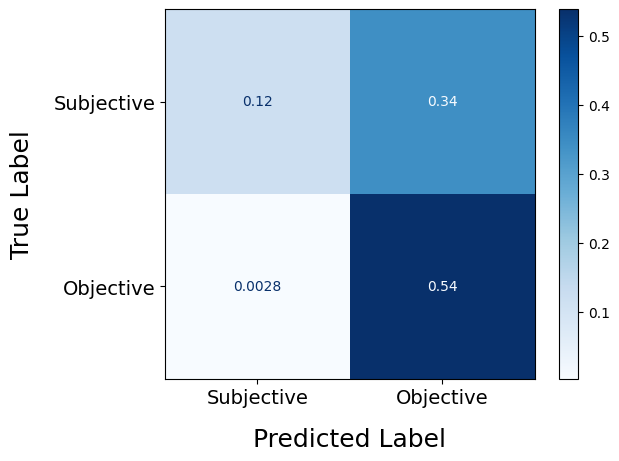

In [58]:
plot_confusion_matrix("infoxml", test_results)

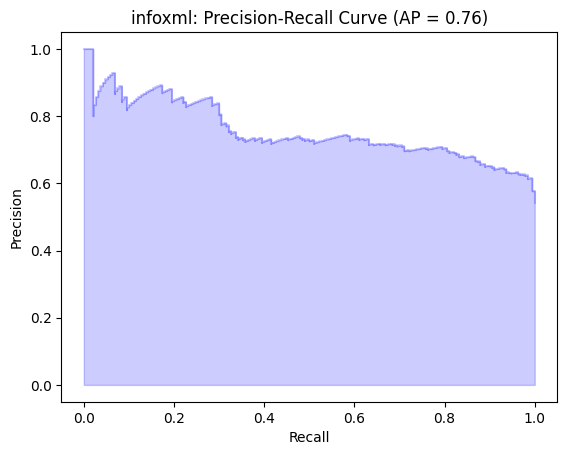

In [59]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

In [60]:
# ROMANIAN

In [61]:
dataset_test = Dataset.from_pandas(df_test_ro)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_ro["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_ro_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/romanian/test_ro_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.7243
            macro-P: 0.7452
            macro-R: 0.7109
            
            SUBJ-F1: 0.5745
            SUBJ-P: 0.6429
            SUBJ-R: 0.5192
            
            accuracy: 0.8058
        


In [62]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_ro["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

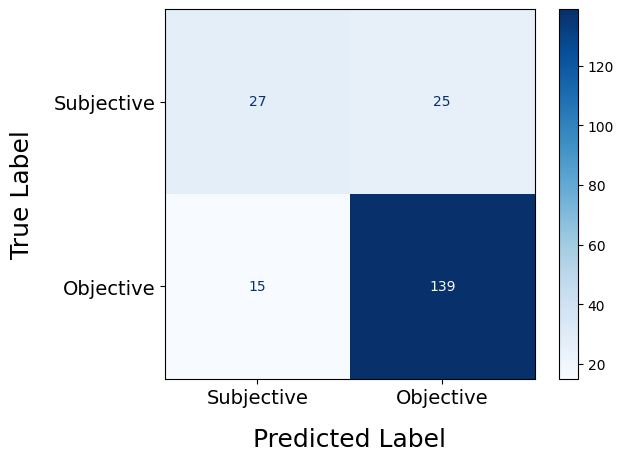

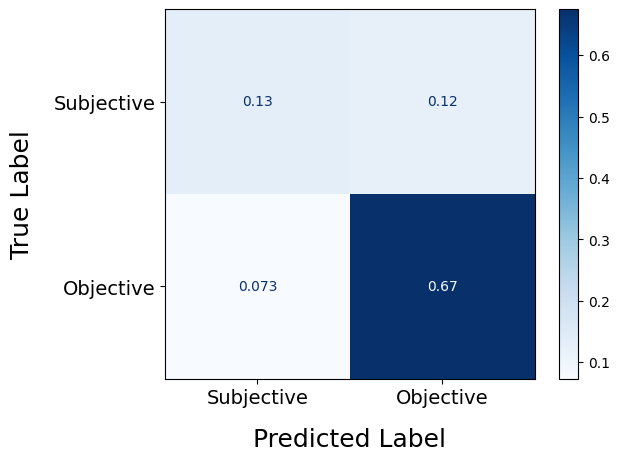

In [63]:
plot_confusion_matrix("infoxml", test_results)

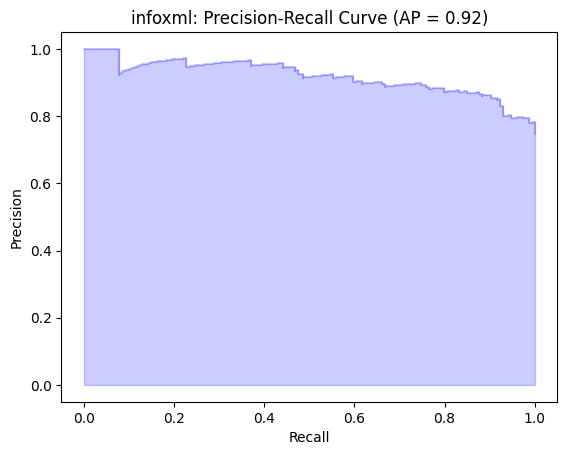

In [64]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

In [65]:
# UKRAINIAN

In [66]:
dataset_test = Dataset.from_pandas(df_test_ukr)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_ukr["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_ukr_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/ukrainian/test_ukr_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/297 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6286
            macro-P: 0.6238
            macro-R: 0.6414
            
            SUBJ-F1: 0.4773
            SUBJ-P: 0.4286
            SUBJ-R: 0.5385
            
            accuracy: 0.6902
        


In [67]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_ukr["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

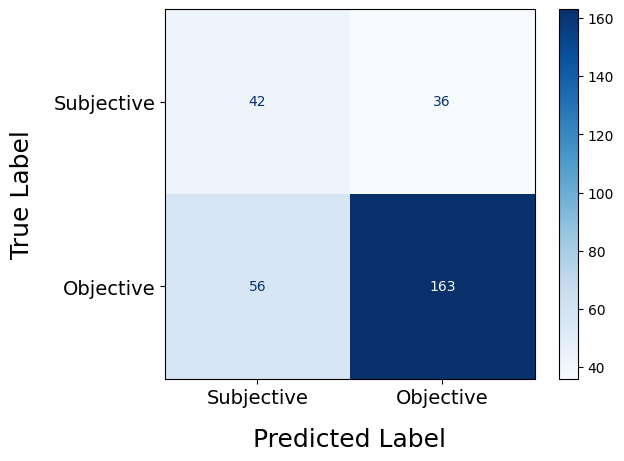

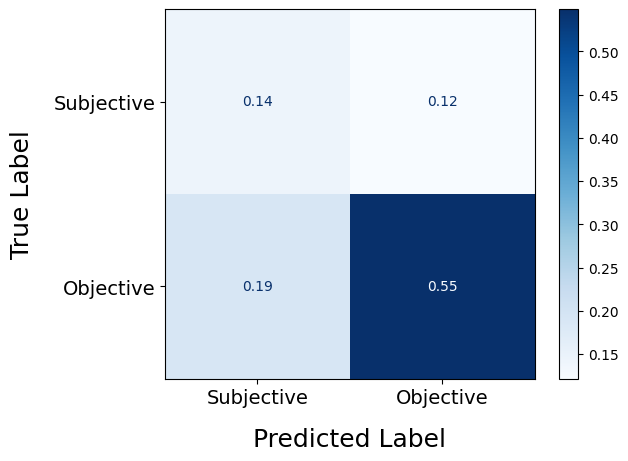

In [68]:
plot_confusion_matrix("infoxml", test_results)

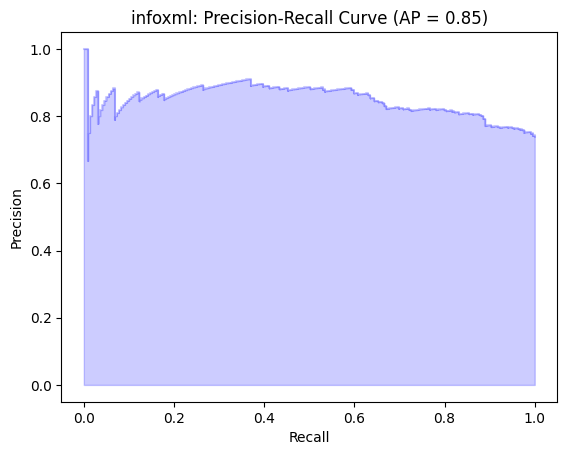

In [69]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("infoxml", precision, recall, average_precision)

## Solution Download

In [70]:
!zip -r infoxml_models.zip infoxml-subjectivity-en infoxml-subjectivity-it infoxml-subjectivity-multi

	zip warning: name not matched: infoxml-subjectivity-en
	zip warning: name not matched: infoxml-subjectivity-it
  adding: infoxml-subjectivity-multi/ (stored 0%)
  adding: infoxml-subjectivity-multi/special_tokens_map.json (deflated 52%)
  adding: infoxml-subjectivity-multi/sentencepiece.bpe.model (deflated 49%)
  adding: infoxml-subjectivity-multi/tokenizer_config.json (deflated 76%)
  adding: infoxml-subjectivity-multi/model.safetensors (deflated 26%)
  adding: infoxml-subjectivity-multi/training_args.bin (deflated 52%)
  adding: infoxml-subjectivity-multi/config.json (deflated 50%)
  adding: infoxml-subjectivity-multi/tokenizer.json (deflated 76%)


In [71]:
!zip infoxml_predictions.zip \
mono_en_test_predictions.tsv \
mono_it_test_predictions.tsv \
multilingual_test_predictions.tsv \
zero_shot_gr_predictions.tsv \
zero_shot_pol_predictions.tsv \
zero_shot_ro_predictions.tsv \
zero_shot_ukr_predictions.tsv

	zip warning: name not matched: mono_en_test_predictions.tsv
	zip warning: name not matched: mono_it_test_predictions.tsv
  adding: multilingual_test_predictions.tsv (deflated 45%)
  adding: zero_shot_gr_predictions.tsv (deflated 45%)
  adding: zero_shot_pol_predictions.tsv (deflated 46%)
  adding: zero_shot_ro_predictions.tsv (deflated 45%)
  adding: zero_shot_ukr_predictions.tsv (deflated 46%)


In [72]:
from google.colab import files

# Download the zipped folders
files.download("infoxml_models.zip")

# Download the zipped predictions
files.download("infoxml_predictions.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>